# Importation des Bibliothèques

In [12]:
%config Completer.use_jedi = False

In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

# Chargement des fichiers csv et création d'un dictionnaire de DataFrame 

In [129]:
# Définir le chemin du répertoire contenant les fichiers CSV

path = "C:\\Users\\loicp\\Documents\\Projets_Jupyter\\Premleg_23_24"

In [131]:
#Initialiser un dictionnaire pour stocker les DataFrames

df_dict = {}

In [133]:
# Charger chaque fichier CSV dans le dictionnaire de DataFrames

for filename in os.listdir(path):
    if filename.endswith(".csv"):

        # Obtenir le nom du fichier sans l'extension pour l'utiliser comme clé
        file_key = filename.replace(".csv", "").replace("-","_").replace(" ","_").lower()


        # Charger le fichier CSV et l'ajouter au dictionnaire
        file_path = os.path.join(path,filename)
        df_dict[file_key] = pd.read_csv(file_path)


# Afficher les noms des fichiers chargés
print("Fichiers chargés:",list(df_dict.keys())) 

Fichiers chargés: ['accurate_cross_team', 'accurate_long_balls_team', 'accurate_pass_team', 'big_chance_missed_team', 'big_chance_team', 'clean_sheet_team', 'corner_taken_team', 'effective_clearance_team', 'expected_goals_conceded_team', 'expected_goals_team', 'fk_foul_lost_team', 'goals_conceded_team_match', 'interception_team', 'ontarget_scoring_att_team', 'penalty_conceded_team', 'penalty_won_team', 'player_accurate_long_balls', 'player_accurate_passes', 'player_big_chances_created', 'player_big_chances_missed', 'player_clean_sheets', 'player_contests_won', 'player_effective_clearances', 'player_expected_assists', 'player_expected_assists_per_90', 'player_expected_goals', 'player_expected_goals_on_target', 'player_expected_goals_per_90', 'player_fouls_committed', 'player_goals_conceded', 'player_goals_per_90', 'player_interceptions', 'player_on_target_scoring_attempts', 'player_outfielder_blocks', 'player_penalties_conceded', 'player_penalties_won', 'player_player_ratings', 'player_

# Exploration et validation des données 

In [136]:
# Aperçu rapide de chaque DataFrame pour vérifier les données

for name, df in df_dict.items():
    print(f"\nAperçu de {name} :")
    print("Dimensions :", df.shape)
    print(df.info())
    print(df.head(), "\n")


Aperçu de accurate_cross_team :
Dimensions : (20, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        20 non-null     int64  
 1   Team                        20 non-null     object 
 2   Accurate Crosses per Match  20 non-null     float64
 3   Cross Success (%)           20 non-null     float64
 4   Matches                     20 non-null     int64  
 5   Country                     20 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB
None
   Rank                    Team  Accurate Crosses per Match  \
0     1               Liverpool                         6.0   
1     2               Brentford                         5.2   
2     3              Luton Town                         5.1   
3     4  Brighton & Hove Albion                         4.8   
4     

# Nettoyage des données

In [140]:
# Nettoyage de chaque DataFrame

for name, df in df_dict.items():

    # Traitement des valeurs manquantes

    if df.isnull().values.any():
        print(f"\n{name} contient des valeurs manquantes")
        print(df.isnull().sum())

        # Exemple de traitement: suppression des lignes où toutes les valeurs sont NaN
        df.dropna(how='all',inplace=True)


        # Standardisation des noms de colonnes
        df.colums = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')


        # Conversion de certaines colonnes en types de données appropriés si nécessaire
        # Exemple : convertir en entiers ou flottants
        for col in df.select_dtypes(include=['object']):
            try:
                df[col] = pd.to_numeric(df[col], errors='ignore')
            except ValueError:
                pass

# Analyse et visualisation exploratoire 

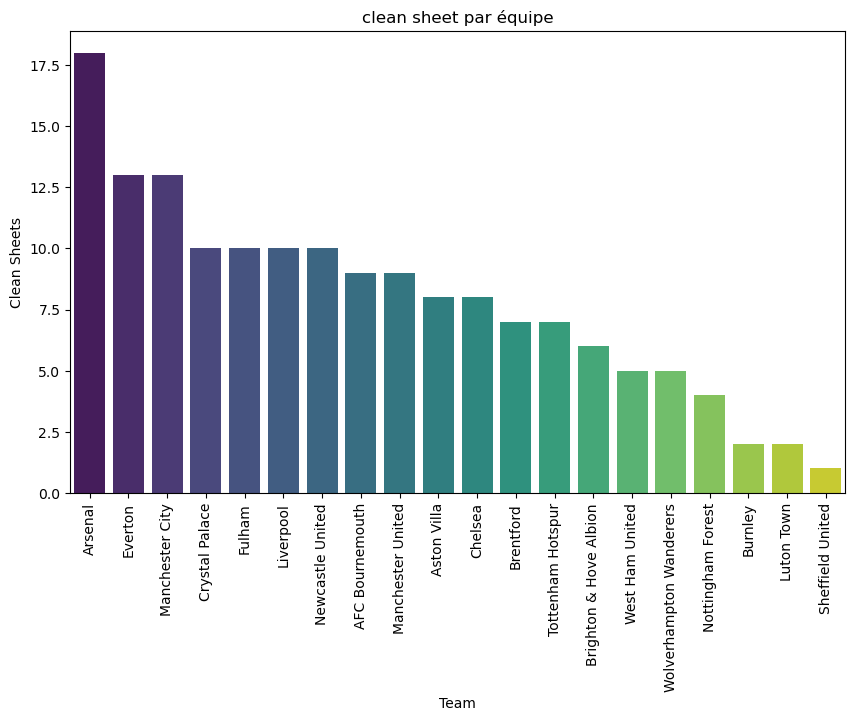

In [158]:
# Visualiser la distribution des clean sheet par équipe durant toute la saison


if 'clean_sheet_team' in df_dict:
    df_team = df_dict['clean_sheet_team']

    plt.figure(figsize=(10,6))
    sns.barplot(data=df_team, x='Team', y='Clean Sheets', hue='Team', palette='viridis', legend=False)
    plt.xticks(rotation=90)
    plt.title("clean sheet par équipe")
    plt.show()

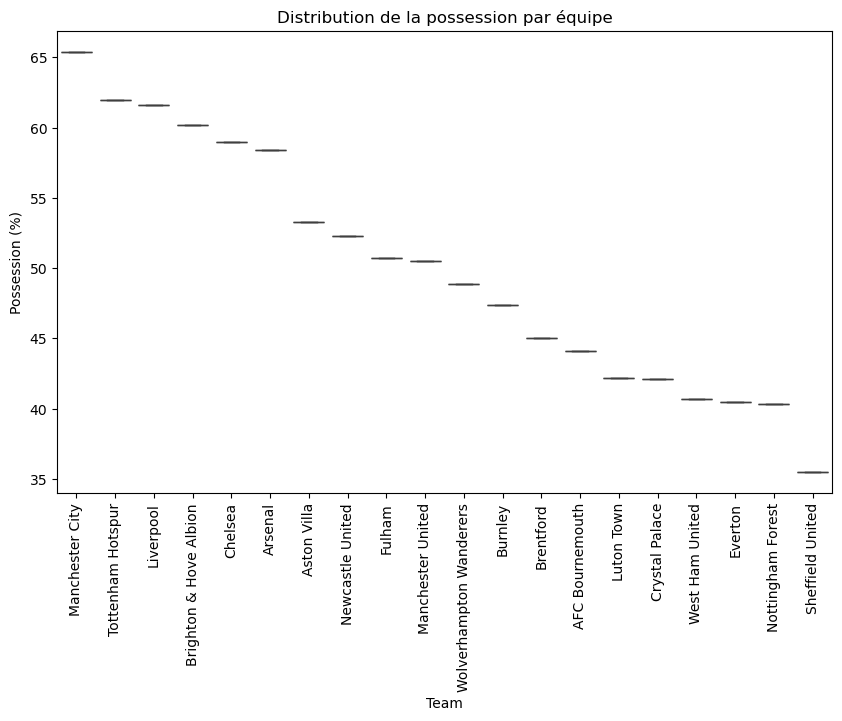

In [165]:
# Histogramme de la possession moyenne de chaque équipe au terme de saison 

df_team = df_dict['possession_percentage_team']

plt.figure(figsize=(10,6))
sns.boxplot(x = "Team", y = "Possession (%)", data = df_team)
plt.xticks(rotation = 90)
plt.title("Distribution de la possession par équipe")
plt.show()

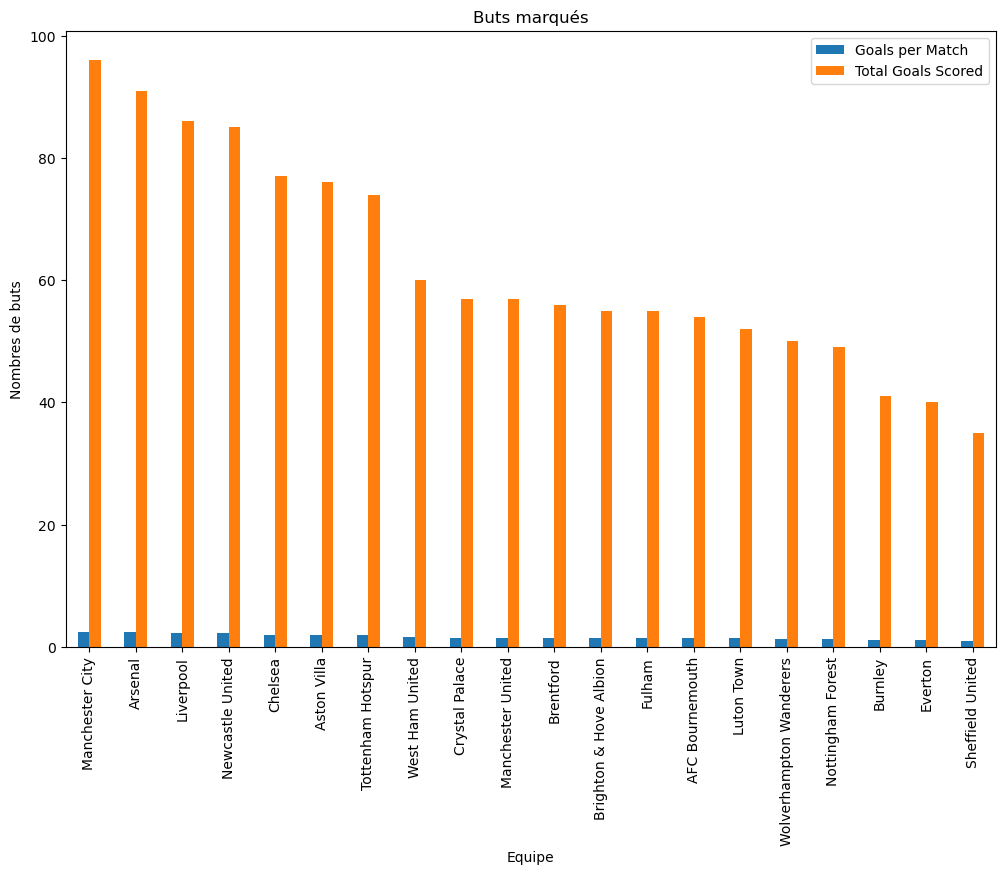

In [171]:
# Graphique en barres pour les buts marqués

df_team = df_dict['team_goals_per_match']
df_team[["Team","Goals per Match","Total Goals Scored"]].set_index("Team").plot(kind="bar", figsize=(12,8))
plt.title("Buts marqués")
plt.xlabel("Equipe")
plt.ylabel("Nombres de buts")
plt.xticks(rotation = 90)
plt.show()

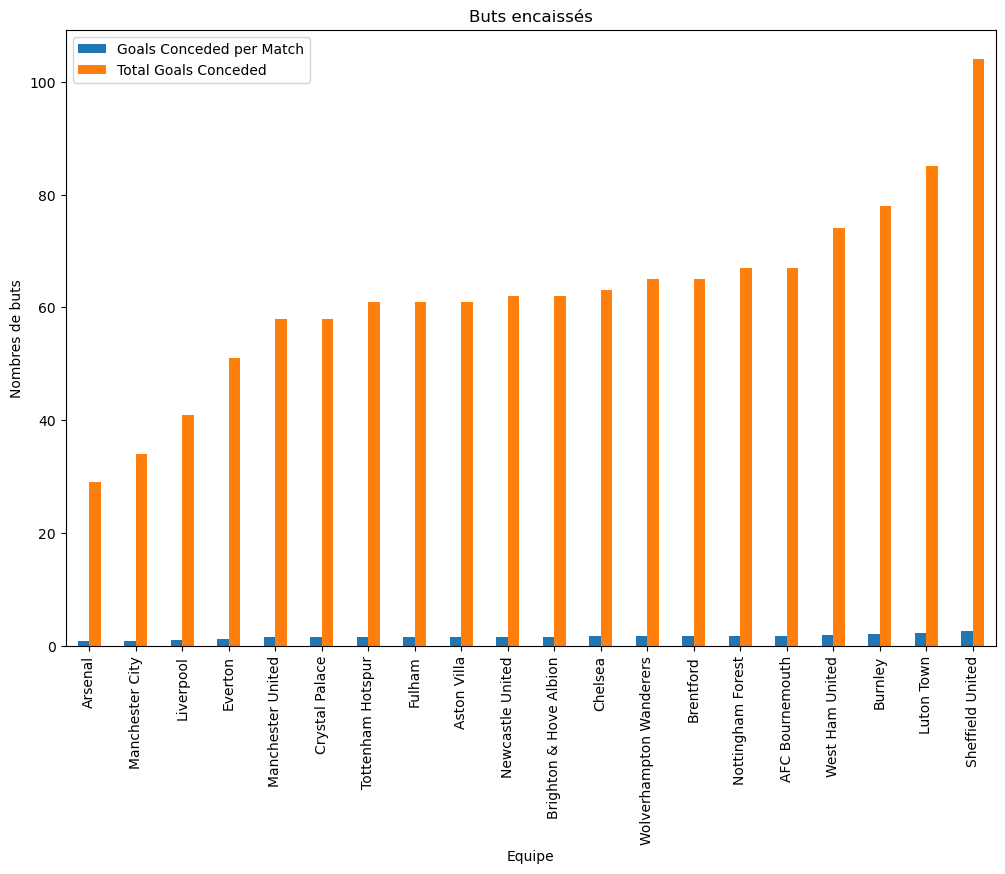

In [173]:
# Graphique en barres pour les buts encaissés

df_team = df_dict['goals_conceded_team_match']
df_team[["Team","Goals Conceded per Match","Total Goals Conceded"]].set_index("Team").plot(kind="bar", figsize=(12,8))
plt.title("Buts encaissés")
plt.xlabel("Equipe")
plt.ylabel("Nombres de buts")
plt.xticks(rotation = 90)
plt.show()

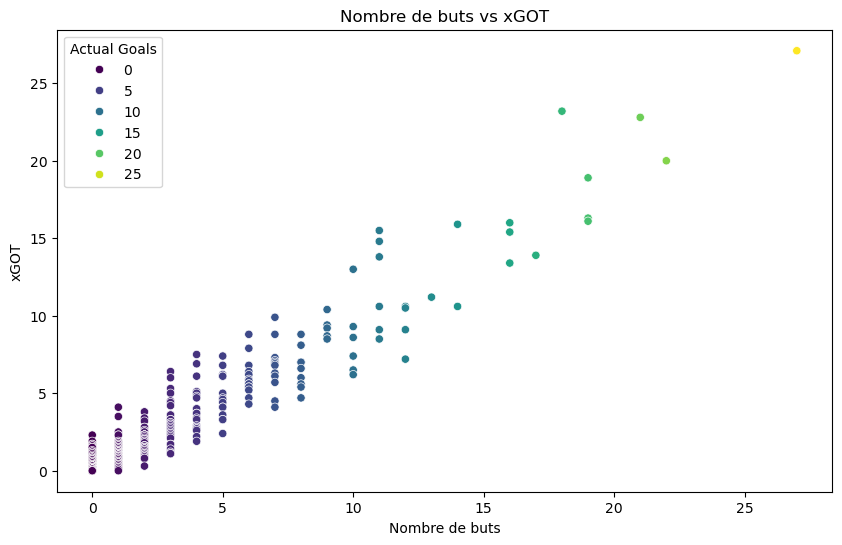

In [185]:
# Nuage de points pour les buts et les Expected Goals Target (xGOT) des  joueurs

df_player = df_dict["player_expected_goals_on_target"]
plt.figure( figsize=(10,6) )
sns.scatterplot(x="Actual Goals", y = "Expected Goals on Target (xGOT)", hue = "Actual Goals", data = df_player, palette = "viridis")
plt.title("Nombre de buts vs xGOT")
plt.xlabel("Nombre de buts")
plt.ylabel("xGOT")
plt.show()

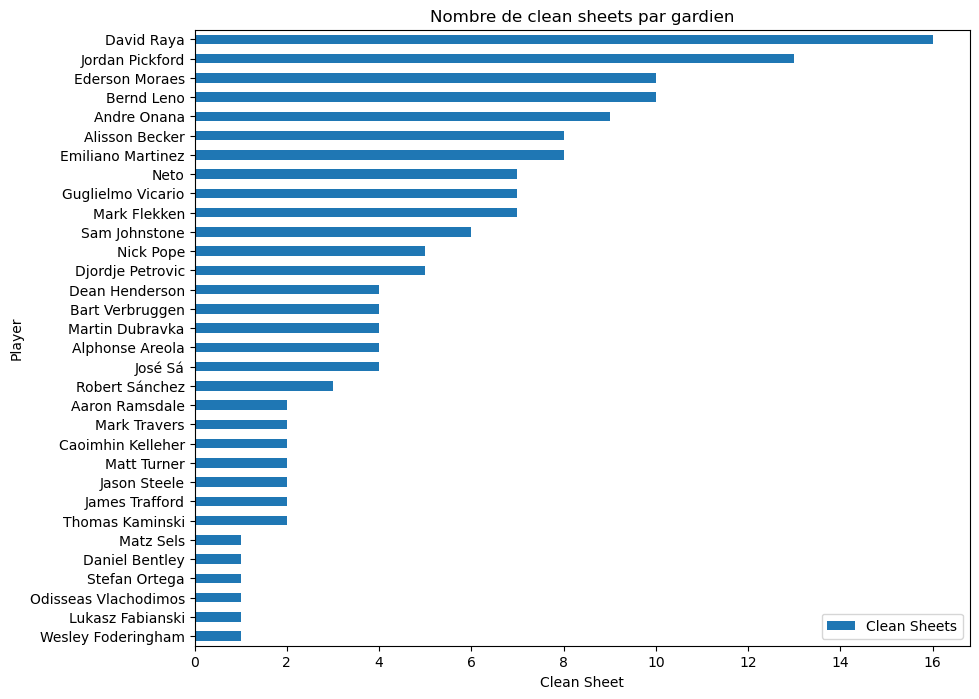

In [187]:
# Graphique en barres pour les cleansheet des gardiens

df_goalkeepers = df_dict["player_clean_sheets"]
df_goalkeepers[["Player","Clean Sheets"]].set_index("Player").sort_values("Clean Sheets").plot(kind="barh", figsize=(10, 8))
plt.title("Nombre de clean sheets par gardien")
plt.xlabel("Clean Sheet")
plt.show()